# Predicting House Price per night

## Exploratory Data Analysis

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
file <- read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2019-11-07/data/listings.csv.gz")

airbnb_df <- subset(file, select = -c(summary, space, listing_url, host_url, description, scrape_id, last_scraped, experiences_offered, 
                                      thumbnail_url, medium_url, xl_picture_url, host_acceptance_rate, name, neighbourhood, 
                                      neighborhood_overview, neighbourhood_group_cleansed, host_neighbourhood, jurisdiction_names, 
                                      license, cancellation_policy, notes, transit, access, interaction, house_rules, picture_url, host_about, 
                                      host_thumbnail_url, host_total_listings_count, minimum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, maximum_minimum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, host_picture_url),message=FALSE)

#removing '$' from price and fees and converting from string to numeric
airbnb_df$price = as.numeric(gsub("\\$", "", airbnb_df$price)) 
airbnb_df$weekly_price = as.numeric(gsub("\\$", "", airbnb_df$weekly_price))
airbnb_df$monthly_price = as.numeric(gsub("\\$", "", airbnb_df$monthly_price))
airbnb_df$cleaning_fee = as.numeric(gsub("\\$", "", airbnb_df$cleaning_fee))
airbnb_df$security_deposit = as.numeric(gsub("\\$", "", airbnb_df$security_deposit))

Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double(),
  scrape_id = col_double(),
  last_scraped = col_date(format = ""),
  thumbnail_url = col_logical(),
  medium_url = col_logical(),
  xl_picture_url = col_logical(),
  host_id = col_double(),
  host_since = col_date(format = ""),
  host_is_superhost = col_logical(),
  host_listings_count = col_double(),
  host_total_listings_count = col_double(),
  host_has_profile_pic = col_logical(),
  host_identity_verified = col_logical(),
  neighbourhood = col_logical(),
  neighbourhood_group_cleansed = col_logical(),
  latitude = col_double(),
  longitude = col_double(),
  is_location_exact = col_logical(),
  accommodates = col_double(),
  bathrooms = col_double()
  # ... with 40 more columns
)
See spec(...) for full column specifications.
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval

In [108]:
#finding the names of all columns and their data type
map(airbnb_df, class)

$id
[1] "numeric"

$host_id
[1] "numeric"

$host_name
[1] "character"

$host_since
[1] "Date"

$host_location
[1] "character"

$host_response_time
[1] "character"

$host_response_rate
[1] "character"

$host_is_superhost
[1] "logical"

$host_listings_count
[1] "numeric"

$host_verifications
[1] "character"

$host_has_profile_pic
[1] "logical"

$host_identity_verified
[1] "logical"

$street
[1] "character"

$neighbourhood_cleansed
[1] "character"

$city
[1] "character"

$state
[1] "character"

$zipcode
[1] "character"

$market
[1] "character"

$smart_location
[1] "character"

$country_code
[1] "character"

$country
[1] "character"

$latitude
[1] "numeric"

$longitude
[1] "numeric"

$is_location_exact
[1] "logical"

$property_type
[1] "character"

$room_type
[1] "character"

$accommodates
[1] "numeric"

$bathrooms
[1] "numeric"

$bedrooms
[1] "numeric"

$beds
[1] "numeric"

$bed_type
[1] "character"

$amenities
[1] "character"

$square_feet
[1] "numeric"

$price
[1] "numeric"

$weekly_price
[1] "numeric"

$monthly_price
[1] "numeric"

$security_deposit
[1] "numeric"

$cleaning_fee
[1] "numeric"

$guests_included
[1] "numeric"

$extra_people
[1] "character"

$minimum_nights
[1] "numeric"

$maximum_nights
[1] "numeric"

$calendar_updated
[1] "character"

$has_availability
[1] "logical"

$availability_30
[1] "numeric"

$availability_60
[1] "numeric"

$availability_90
[1] "numeric"

$availability_365
[1] "numeric"

$calendar_last_scraped
[1] "Date"

$number_of_reviews
[1] "numeric"

$number_of_reviews_ltm
[1] "numeric"

$first_review
[1] "Date"

$last_review
[1] "Date"

$review_scores_rating
[1] "numeric"

$review_scores_accuracy
[1] "numeric"

$review_scores_cleanliness
[1] "numeric"

$review_scores_checkin
[1] "numeric"

$review_scores_communication
[1] "numeric"

$review_scores_location
[1] "numeric"

$review_scores_value
[1] "numeric"

$requires_license
[1] "logical"

$instant_bookable
[1] "logical"

$is_business_travel_ready
[1] "logical"

$require_guest_profile_picture
[1] "logical"

$require_guest_phone_verification
[1] "logical"

$calculated_host_listings_count
[1] "numeric"

$calculated_host_listings_count_entire_homes
[1] "numeric"

$calculated_host_listings_count_private_rooms
[1] "numeric"

$calculated_host_listings_count_shared_rooms
[1] "numeric"

$reviews_per_month
[1] "numeric"

Warning message:
"Removed 383 rows containing missing values (geom_point)."


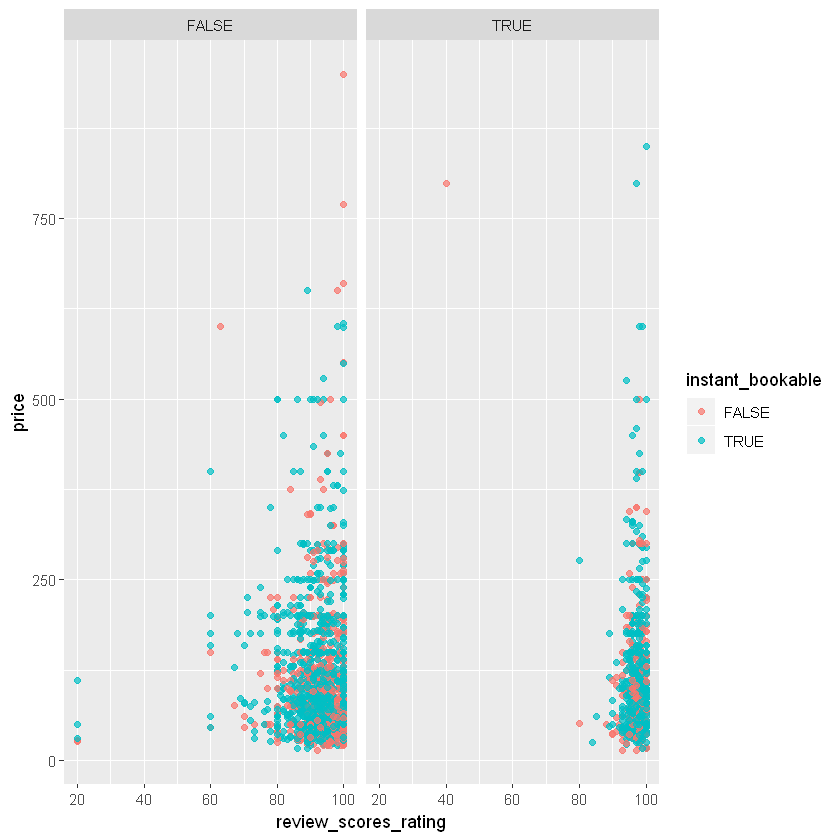

In [26]:
#not our figure --- just playing around with variables
ggplot(data = airbnb_df) + 
geom_point(aes(x = review_scores_rating, y = price, color = instant_bookable), alpha = 0.7) +
facet_grid(cols = vars(host_is_superhost))

## Scatterplot Matrices for select numeric variables of interest

In [87]:
#airbnb_df['host_listings_count']==airbnb_df['host_total_listings_count']

In [88]:
options(repr.plot.width = 12, repr.plot.height = 9)

In [112]:
numeric_1 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[2:7]
numeric_1[1] = 'price'
numeric_subset1 <- airbnb_df[,numeric_1]

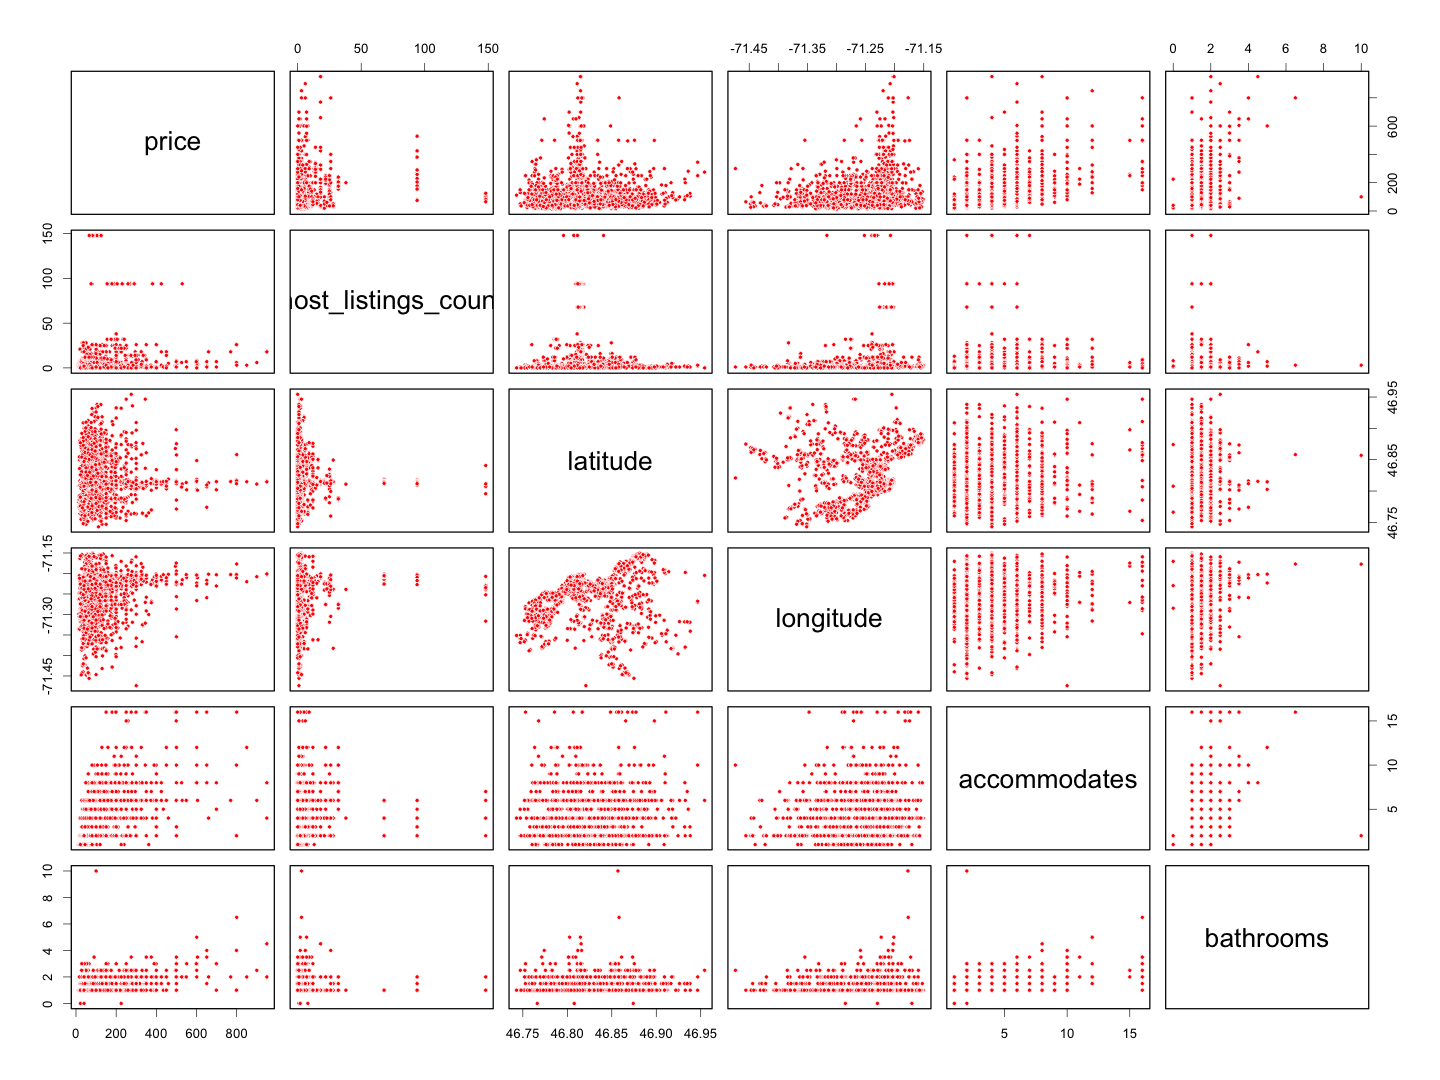

In [113]:
#plot_1  <- airbnb_df[,c('price','host_listings_count','latitude','longitude','accommodates','bathrooms')]
pairs(numeric_subset1,pch = 21,cex = 0.7,bg="red",col="white",lwd= 0.5, cex.labels=2)

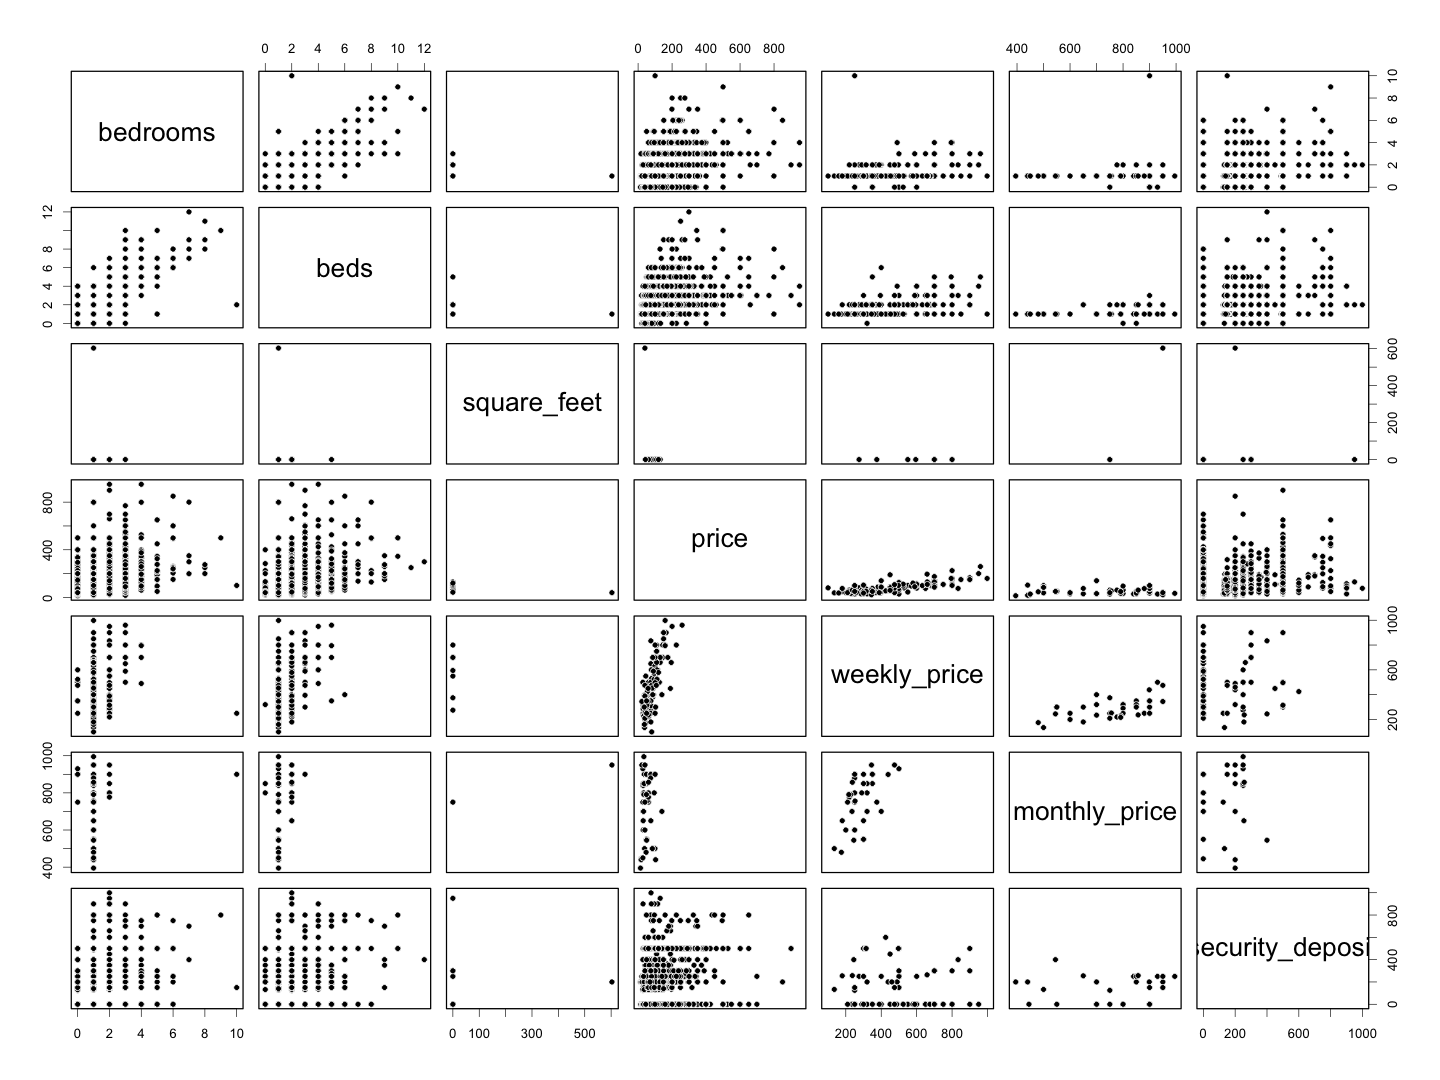

In [114]:
numeric_subset2 <- airbnb_df[,colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[8:14]]
pairs(numeric_subset2,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

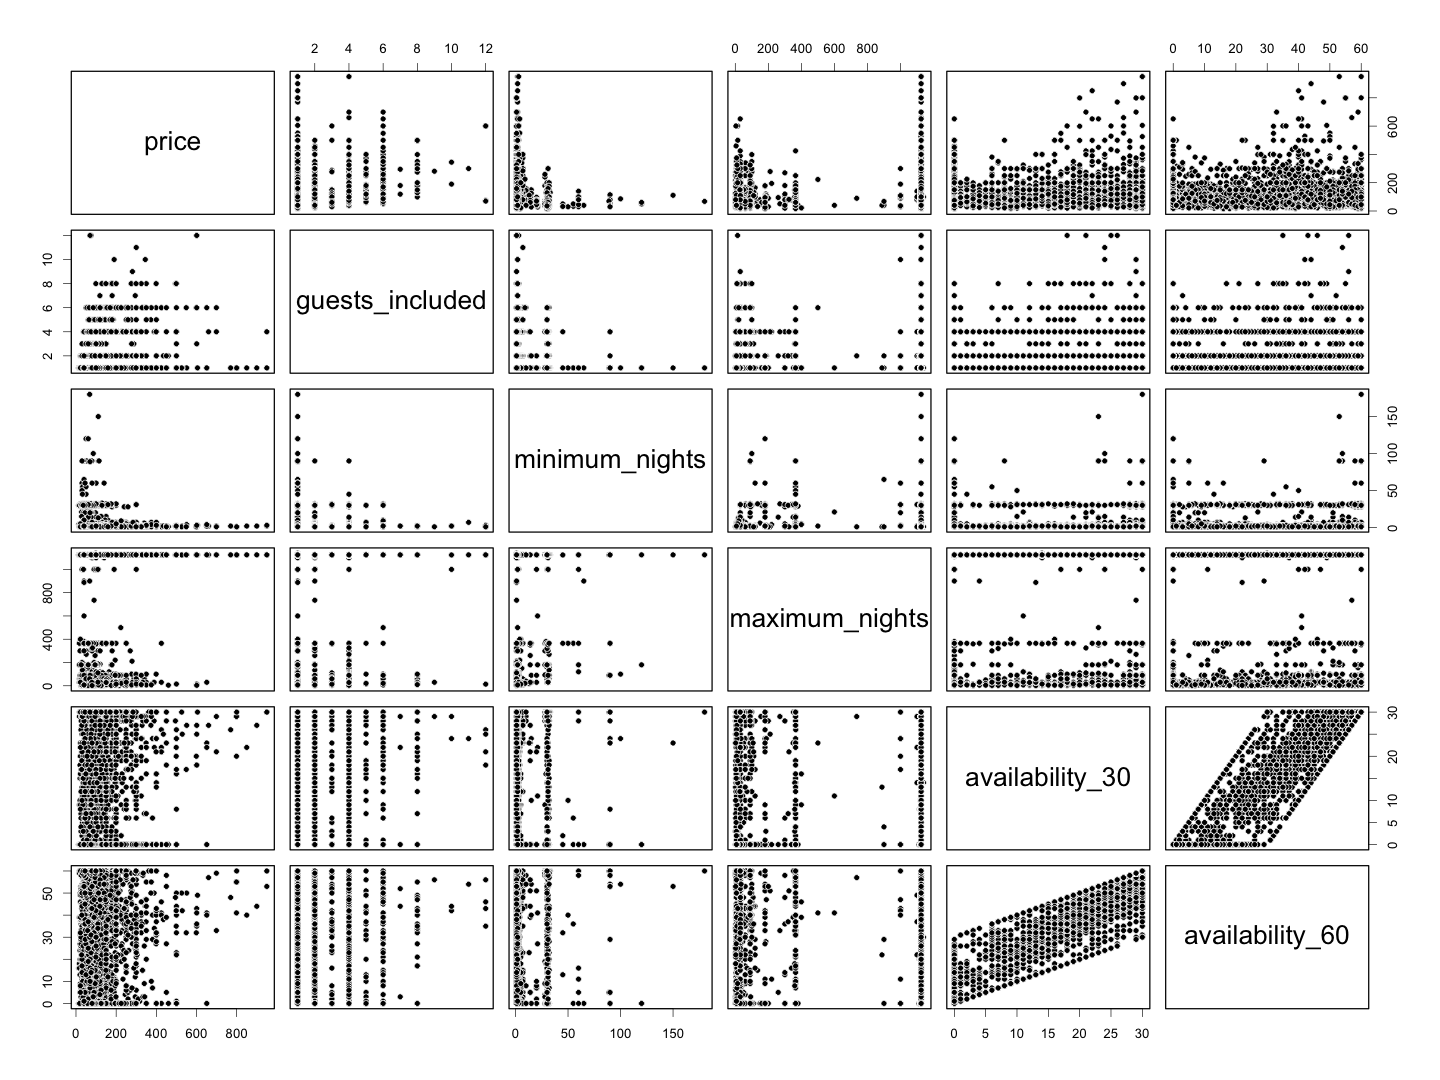

In [116]:
numeric_3 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[15:20]
numeric_3[1] = 'price'
numeric_subset3 <- airbnb_df[,numeric_3]

pairs(numeric_subset3,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

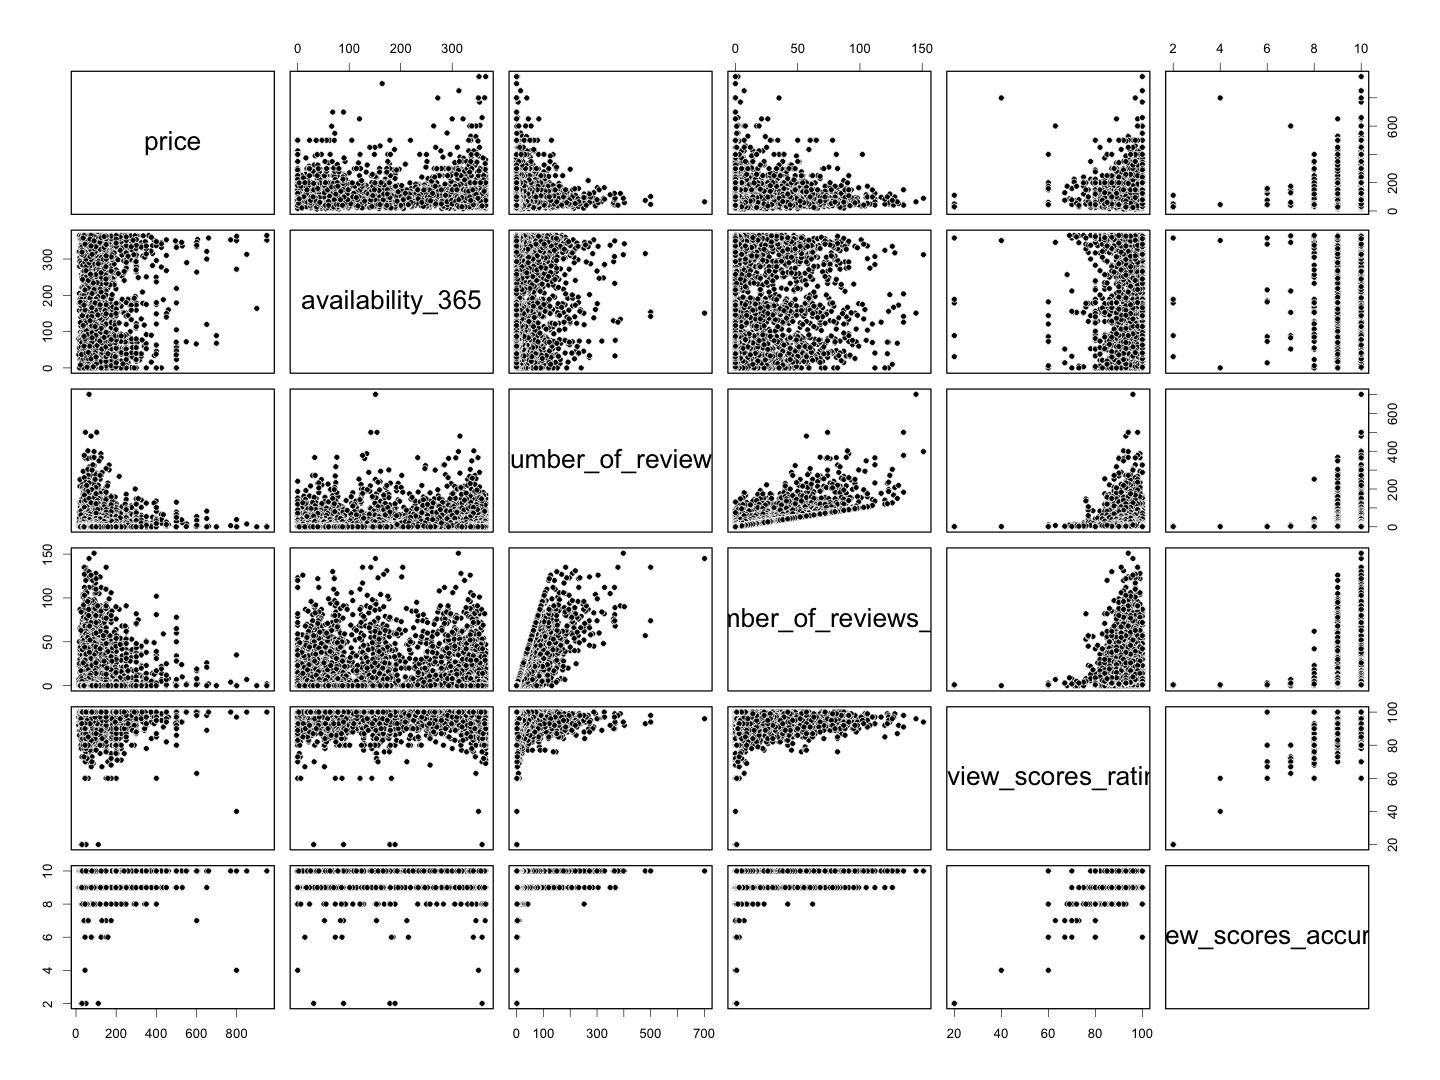

In [120]:
numeric_4 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[21:26]
numeric_4[1] = 'price'
numeric_subset4 <- airbnb_df[,numeric_4]
pairs(numeric_subset4,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

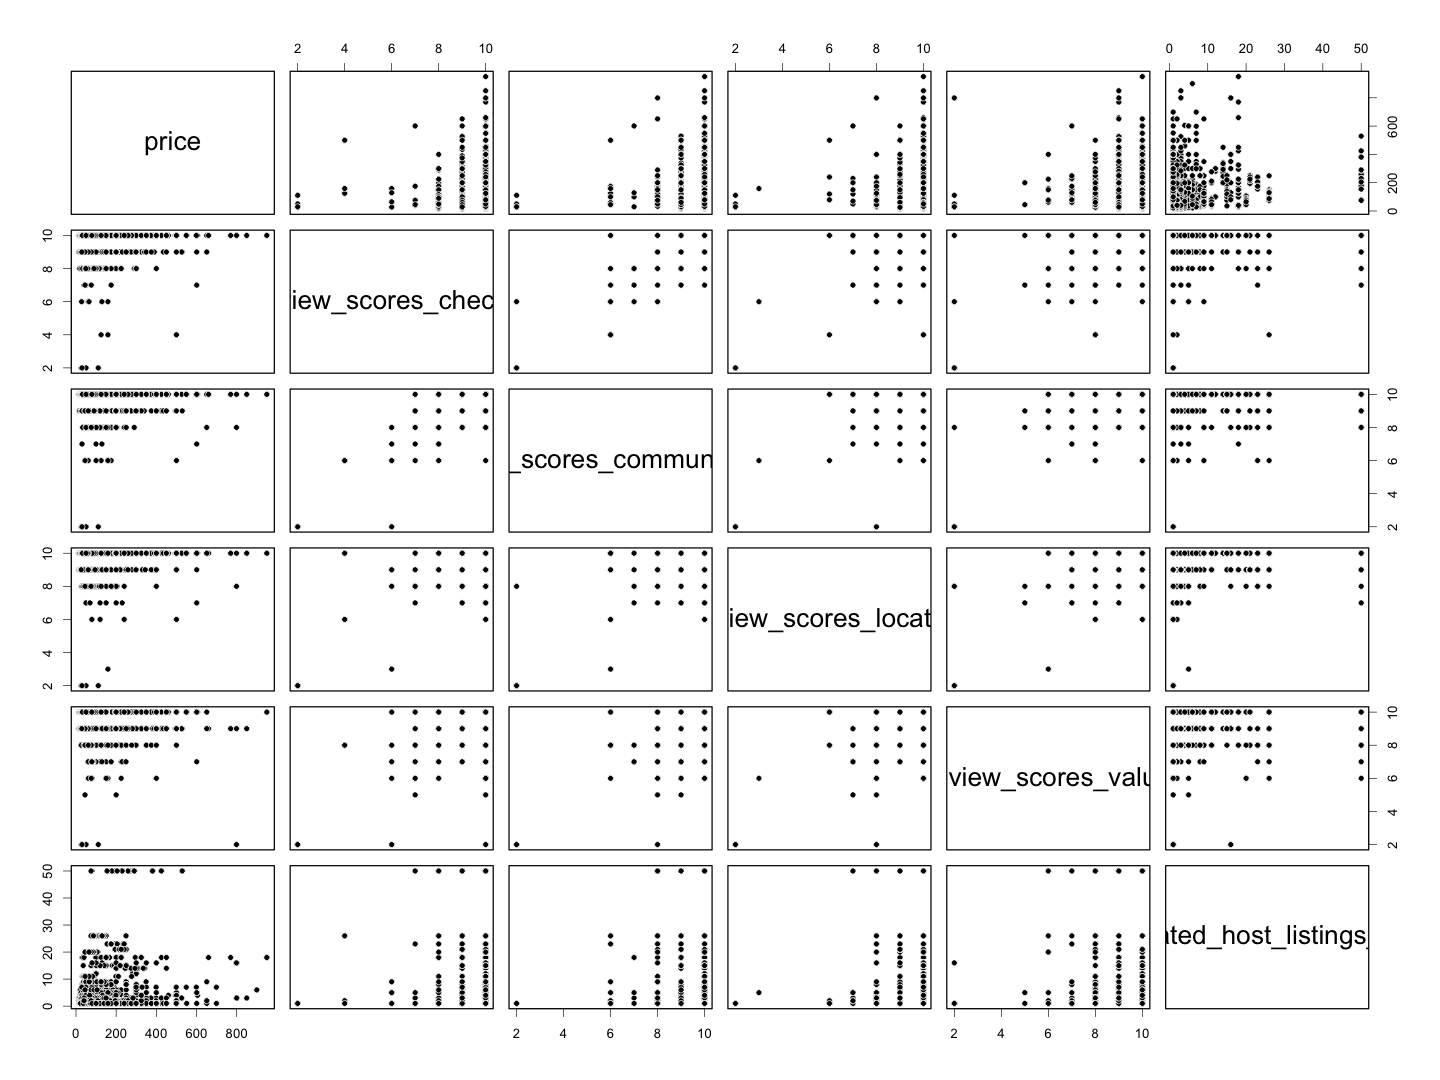

In [123]:
numeric_5 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[27:32]
numeric_5[1] = 'price'
numeric_subset5 <- airbnb_df[,numeric_5]
pairs(numeric_subset5,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

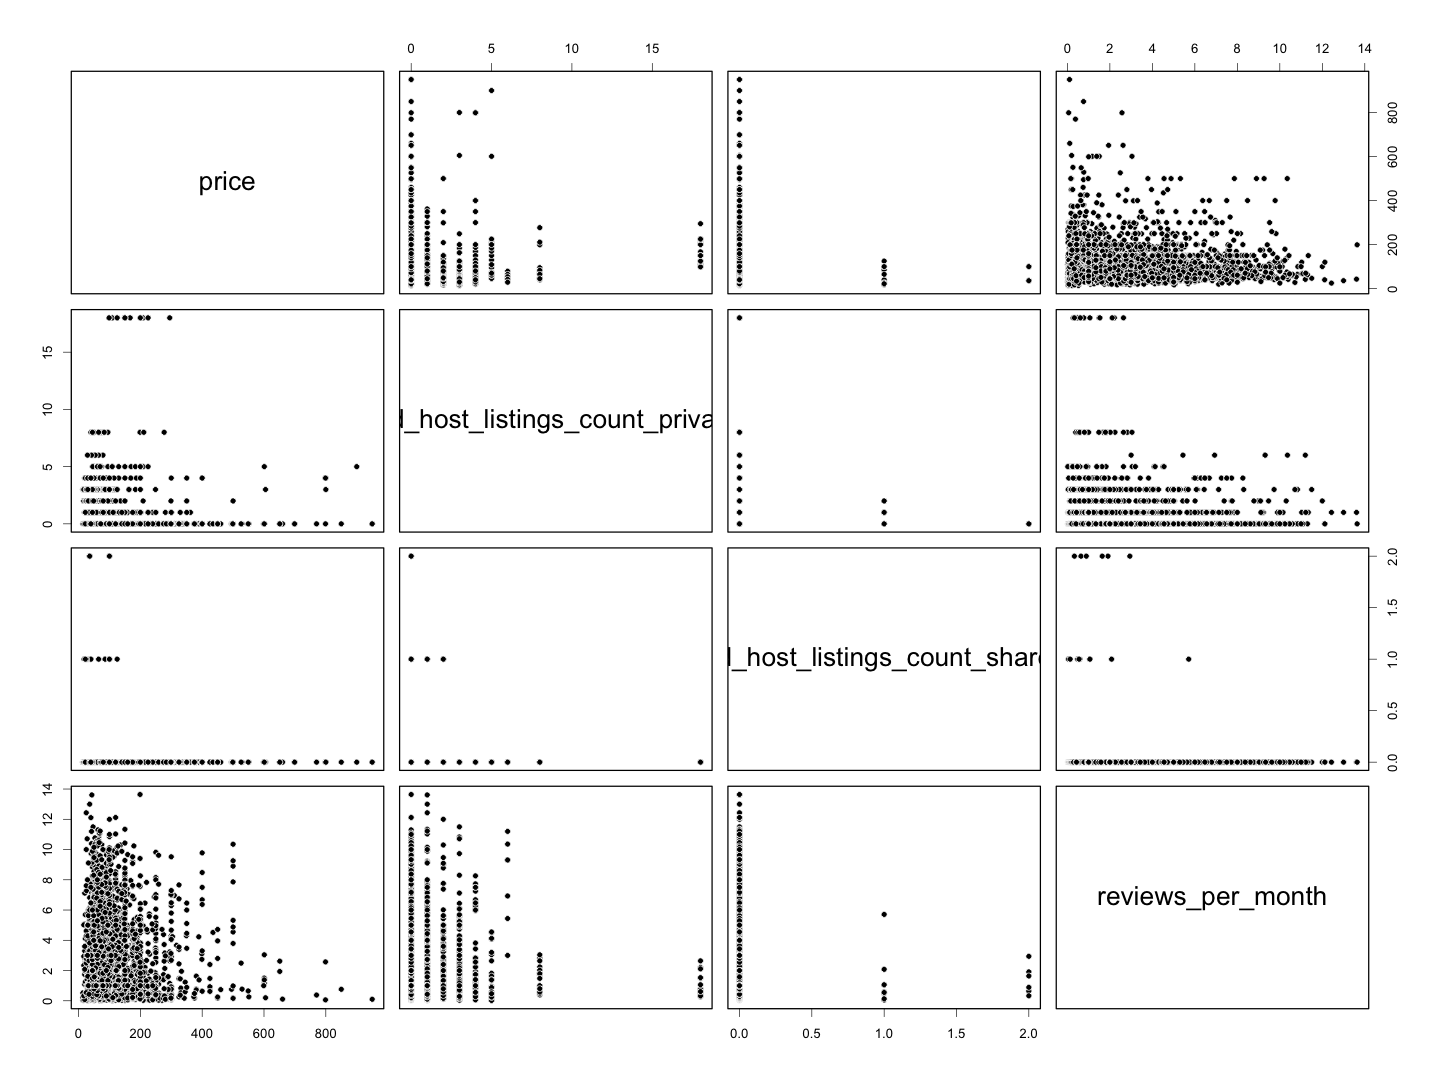

In [130]:
numeric_6 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[33:36]
numeric_6[1] = 'price'
numeric_subset6 <- airbnb_df[,numeric_6]

pairs(numeric_subset6,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

In [147]:
#Todo

#Count of property type, room type, barplot
#ggpairs() warnings are annoying
#Remove NAs. 

Warning message in ggmatrix_gtable(x, ...):
“Please use the 'progress' parameter in your ggmatrix-like function call.  See ?ggmatrix_progress for a few examples.  ggmatrix_gtable 'progress' and 'progress_format' will soon be deprecated.TRUE”
Warning message:
“Removed 57 rows containing non-finite values (stat_density).”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 57 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 57 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 57 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 57 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 59 rows containing missing values”
Warning message:
“Remov

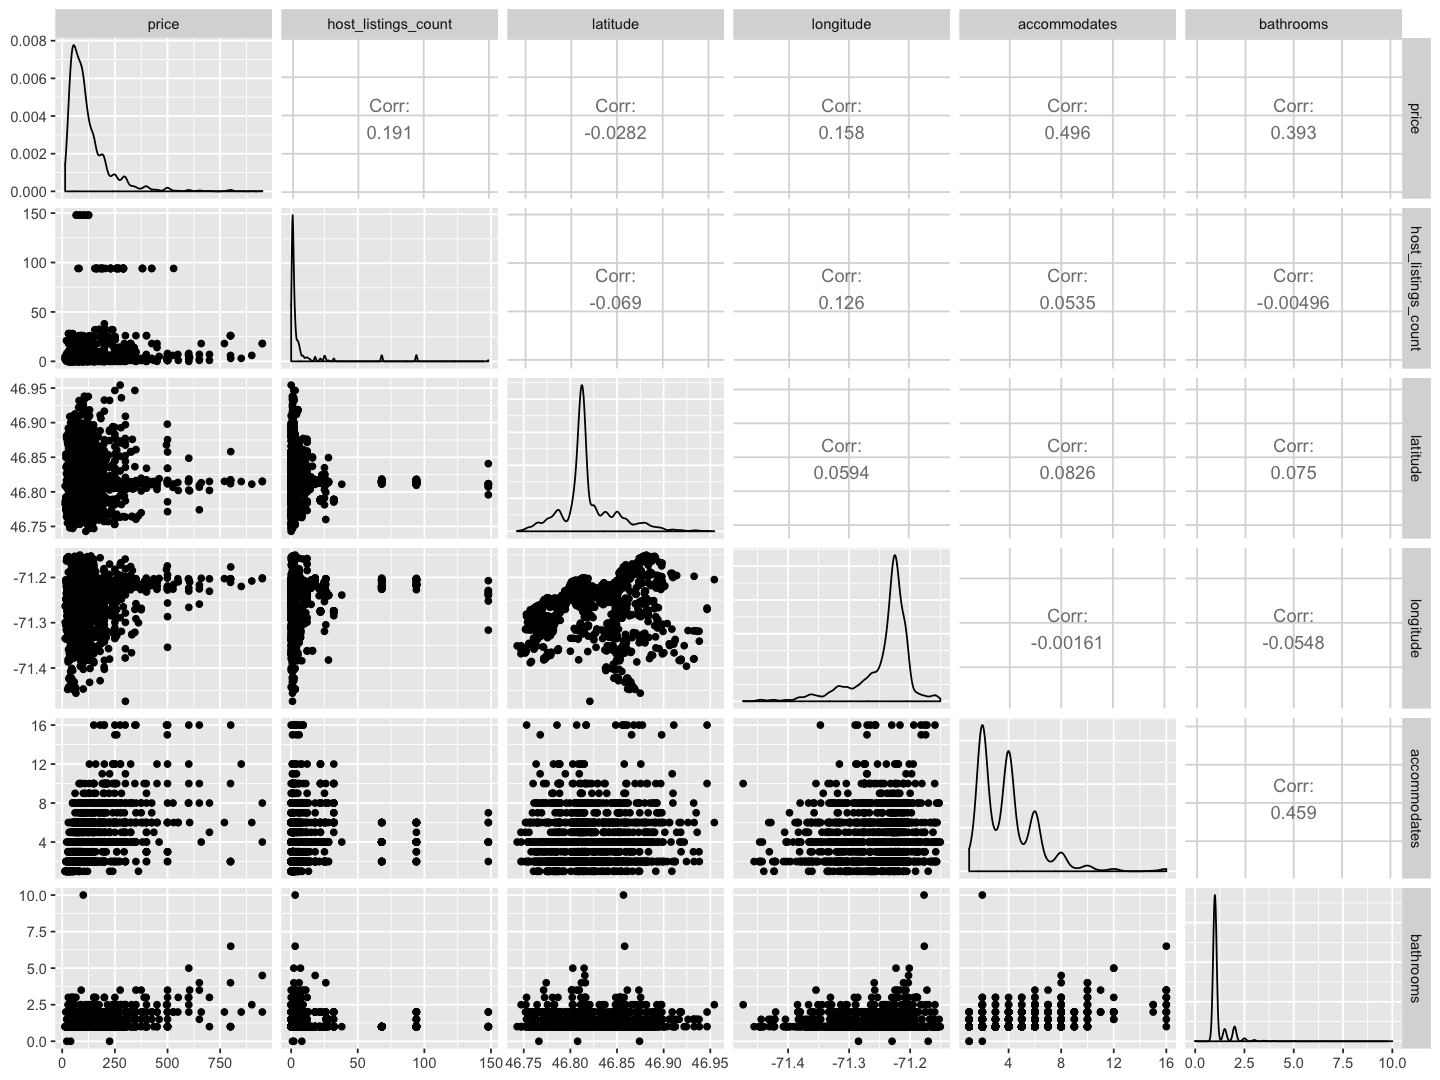

In [136]:
library(GGally)

numeric_subset1 %>% 
    ggpairs()%>%
    print(progress = F)
